# **The Sparks Foundation Internship- Task-2**

### Data Science and Business Analytics 

## Author- Shivani Sharma

### **K- Means Clustering or 'The elbow method'**

In this task, we will be predicting the optimum number of clusters from the given 'Iris Dataset' and represent it visually using K-Means Clustering.

**Importing the required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

**Importing the given 'iris dataset'**

In [6]:
# Importing the given 'iris dataset'
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) # See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Let's find the clusters for us to use the K- Means Clustering algorithm

In [10]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print("Clustering Complete")

Clustering Complete


### Plot a line graph of above clustering for better observation

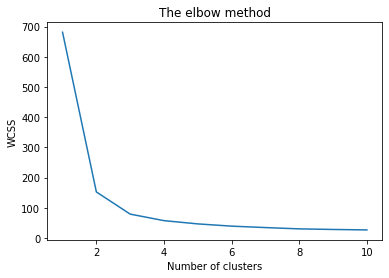

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

This is very important aspect of K means algorithm. According to this, the 'elbow' is basically a point in the graph where the WCSS doesn't decrease significantly with every increasing number of iteration. Thus optimum number of clusters is where the 'elbow' occurs which is 3 in this case.

## Now it's time to create the kmeans classifier

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

print("Classification Done")

Classification Done


## Visualising the cluster

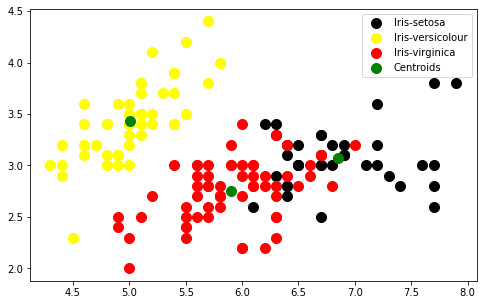

In [19]:
## Visualizing on the first 2 columns.
plt.figure(figsize=(8,5))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Green', label = 'Centroids')

plt.legend()